# 프로젝트 : 나랑 닮은 연예인을 찾아보자

## Step1. 사진 모으기
**1. 내 사진 찍기**
    
- 사진을 2장 이상 찍는다.
- 내 사진끼리의 얼굴 임베딩 벡터 거리를 구해본다.
- 거리가 멀게 나온다면 왜 그런지 생각해 본다.
    
**2. 비교할 연예인 사진 모으기**
    
- 많이 모을수록 나와 더 닮은 연예인 찾을 가능성이 높아진다.

file_list: ['디카프리오.jpg', '차태현.jpg', '공유.jpg', '장혁.jpg', '유연석.jpg', 'jiyun_2.jpg', '변요한.jpg', 'joseph.jpg', '류승룡.jpg', 'jiyun_1.jpg', '유상무.jpg', '장동건.jpg']


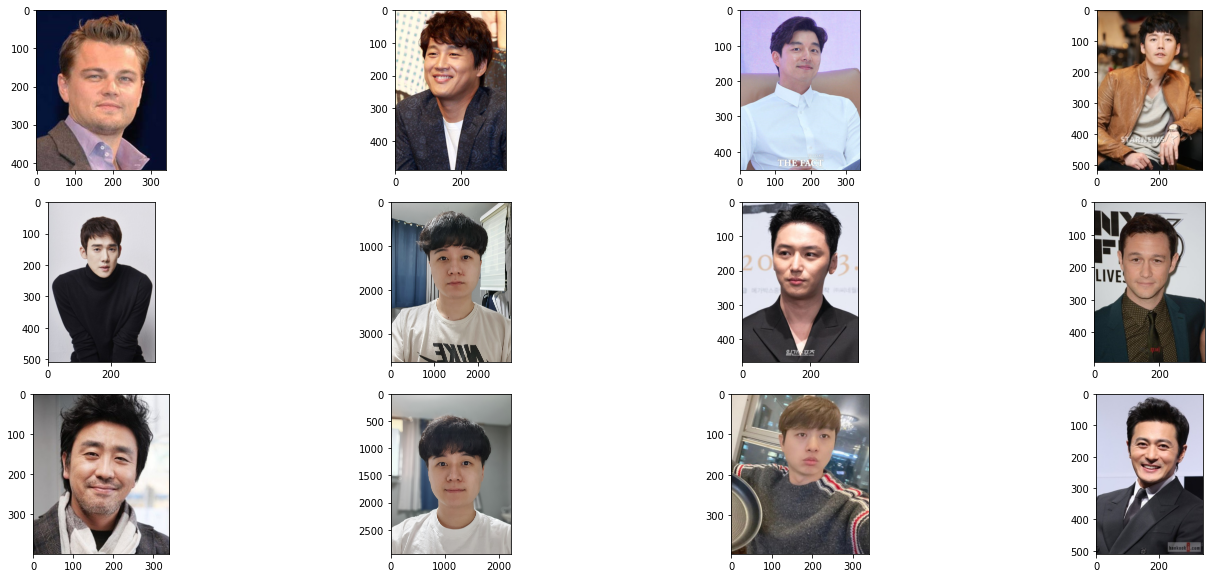

In [ ]:
# sample images 확인

import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
file_list = os.listdir(dir_path)

print(f"file_list: {file_list}")

import matplotlib.pyplot as plt
import matplotlib.image as img

fig, axes = plt.subplots(3, 4, figsize=(24, 10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

## Step2. 얼굴 영역 자르기

In [ ]:
# 얼굴영역만 crop하는 함수 구현하기

import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

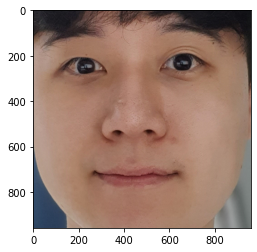

In [ ]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images2/jiyun_1.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기

### 1. 먼저 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수를 구현해본다.

In [ ]:
# 내 얼굴이미지 1

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
image_file = os.path.join(dir_path, 'jiyun_1.jpg')
my_face_1 = get_cropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding_my_face_1 = get_face_embedding(my_face_1)
A = np.array(embedding_my_face_1)

In [ ]:
# 내 얼굴이미지 2

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
image_file = os.path.join(dir_path, 'jiyun_2.jpg')
my_face_2 = get_cropped_face(image_file)
embedding_my_face_2 = get_face_embedding(my_face_2)
B = np.array(embedding_my_face_2)

In [ ]:
import numpy as np

distances = np.linalg.norm(A - B, axis=1, ord=2)
print(f"나의 얼굴 사진 2장을 비교해 왔을 때의 distances : {distances}")
# 같은 얼굴 사진이기 때문에 거리가 가깝게 나왔다!

나의 얼굴 사진 2장을 비교해 왔을 때의 distances : [0.26266844]


### 2. images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수를 하나 만들어 본다.

In [ ]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [ ]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['jiyun_1']

array([-0.00206927,  0.02636987, -0.01840684, -0.06665391, -0.09995639,
       -0.02336206, -0.06958143, -0.09097624,  0.03976569, -0.11279154,
        0.25220332, -0.11547092, -0.21072385, -0.11170983, -0.02627376,
        0.16570756, -0.13728909, -0.06704205, -0.04450782,  0.04554759,
        0.0760304 ,  0.01998265,  0.01871518,  0.0346003 , -0.09471853,
       -0.3132816 , -0.06634843, -0.08393011, -0.01884095, -0.06110747,
       -0.0605113 ,  0.04854255, -0.19637226, -0.0370986 ,  0.05394273,
        0.03972558, -0.0099624 , -0.05331565,  0.16634424,  0.04573726,
       -0.25556478,  0.0523391 ,  0.02640677,  0.20765643,  0.13528945,
        0.05606614,  0.01386345, -0.16750205,  0.1408641 , -0.1779528 ,
        0.0991065 ,  0.0670717 ,  0.10666586, -0.00640603, -0.01901515,
       -0.15311036,  0.02140023,  0.1036837 , -0.15236887,  0.02338029,
        0.08118577, -0.02223036, -0.05659422, -0.13071409,  0.2172448 ,
        0.07987481, -0.128502  , -0.19185482,  0.13825169, -0.12

## Step4. 모은 연예인들과 비교해보기

In [ ]:
# 인자로 파일명의 사람 이름 2개를 받아서, 두 사람의 얼굴 임베딩 사이의 거리를 구하는 함수를 구현해본다.

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord=2)

get_distance('jiyun_1', 'jiyun_2')

0.26266844080035884

In [ ]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('jiyun_1')

In [ ]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('jiyun_1',
  array([-0.00206927,  0.02636987, -0.01840684, -0.06665391, -0.09995639,
         -0.02336206, -0.06958143, -0.09097624,  0.03976569, -0.11279154,
          0.25220332, -0.11547092, -0.21072385, -0.11170983, -0.02627376,
          0.16570756, -0.13728909, -0.06704205, -0.04450782,  0.04554759,
          0.0760304 ,  0.01998265,  0.01871518,  0.0346003 , -0.09471853,
         -0.3132816 , -0.06634843, -0.08393011, -0.01884095, -0.06110747,
         -0.0605113 ,  0.04854255, -0.19637226, -0.0370986 ,  0.05394273,
          0.03972558, -0.0099624 , -0.05331565,  0.16634424,  0.04573726,
         -0.25556478,  0.0523391 ,  0.02640677,  0.20765643,  0.13528945,
          0.05606614,  0.01386345, -0.16750205,  0.1408641 , -0.1779528 ,
          0.0991065 ,  0.0670717 ,  0.10666586, -0.00640603, -0.01901515,
         -0.15311036,  0.02140023,  0.1036837 , -0.15236887,  0.02338029,
          0.08118577, -0.02223036, -0.05659422, -0.13071409,  0.2172448 ,
          0.07987481, -0.

In [ ]:
def get_nearest_face(name, top=10): 
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top + 1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print(f'순위 {i} : 이름({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])})')

In [ ]:
get_nearest_face('jiyun_1')

순위 1 : 이름(jiyun_2), 거리(0.26266844080035884)
순위 2 : 이름(유상무), 거리(0.4324174299005888)
순위 3 : 이름(차태현), 거리(0.4501082668239653)
순위 4 : 이름(유연석), 거리(0.492575104787463)
순위 5 : 이름(장혁), 거리(0.5155240278553573)
순위 6 : 이름(공유), 거리(0.5638223731930557)
순위 7 : 이름(변요한), 거리(0.5931301768875539)
순위 8 : 이름(장동건), 거리(0.6195832753038183)
순위 9 : 이름(류승룡), 거리(0.649427354340558)
순위 10 : 이름(joseph), 거리(0.78277703295287)


# 회고

## 전반적인 회고

- 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있었다.
- 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈지만 충분한 수의 이미지를 비교하지 못했다.
- tkinter을 사용해서 닮은꼴을 찾아주는 GUI를 구현해보려 했지만 jupyter notebook과 google colab에서는 이상하게 지원이 되지 않아 해보지 못했다.

## 이미지 모으기에 대한 회고
- 사진을 많이 모아야 하는 상황에서 하나하나 찾아서 다운받기에는 너무 비효율적이었다.
- 구글링을 통해 crwaling 을 알게 되었고, crawling을 시도해보기 위해 다양한 방법을 찾아봤다.


- crwaling 코드



```
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus

baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
plusUrl = input('검색어를 입력하세요 : ')
# 한글 검색 자동 변환
url = baseUrl + quote_plus(plusUrl)
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')

n = 1
for i in img:
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open('./img/' + plusUrl + str(n)+'.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    n += 1
print('다운로드 완료')
```



- 다음과 같은 방법으로 crwaling을 해봤는데 다운로드가 되지 않고 그 이유를 찾지 못했다.
- BeautifulSoup에 대한 지식도 부족했고 코드에 대한 전반적인 이해도도 부족했다.


- crwaling에 대한 유튜브

[완전 쉽게 파이썬으로 텍스트 및 이미지 크롤링하기](https://www.youtube.com/watch?v=ZTJjW7XuHIY)

- 위의 유튜브를 통해 구름IDE라는 새로운 환경에서 beautiful soup와 google-images-download를 사용한 방법으로 쉽게 이미지를 다운받는 방법이 나와있지만 이 ipython에 적용시키는 방법에 대해 생각할 수 없었다.
- 결과적으로는 이미지 파일을 10개 정도 다운받아 비교해보기로 생각했다.